輸入要幾*幾的圖片5


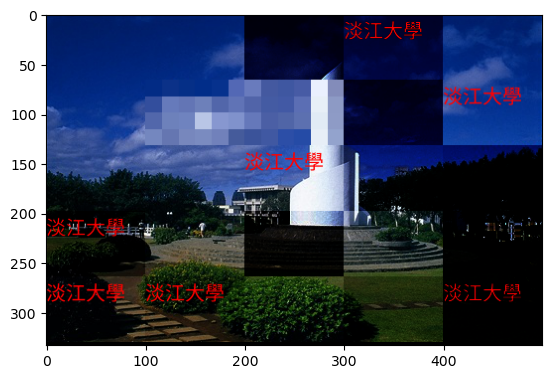

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import random

def mosaic(img, level):
    size = img.shape
    h = int(size[0] / level)
    w = int(size[1] / level)
    mosaic_img = cv2.resize(img, (w, h), interpolation=cv2.INTER_LINEAR)
    mosaic_img = cv2.resize(mosaic_img, (size[1], size[0]), interpolation=cv2.INTER_NEAREST)
    return mosaic_img

def colordraw(img, x, y, R, G, B, WordSize, word):
    imgPil = Image.fromarray(img)
    draw = ImageDraw.Draw(imgPil)
    fontpath = 'NotoSansTC-Regular.ttf'
    draw.text((x, y), word, fill=(R, G, B), font=ImageFont.truetype(fontpath, WordSize))
    return np.array(imgPil)

def gamma_correction(f, gamma=2.0):
    g = f.copy()
    nr, nc = f.shape[:2]
    c = 255.0 / (255.0 ** gamma)
    x = np.linspace(0, 255, 256)
    table = x ** gamma * c
    if f.ndim == 3:
        for i in range(nr):
            for j in range(nc):
                for k in range(3):
                    g[i, j, k] = table[f[i, j, k]]
    elif f.ndim == 2:
        for i in range(nr):
            for j in range(nc):
                g[i, j] = table[f[i, j]]
    return g

# 讀取圖片
img = cv2.imread('Commons.jpeg')

# 使用 PIL Image 來計算寬度和高度
image = Image.open('Commons.jpeg')
width, height = image.size
n = int(input("輸入要幾*幾的圖片"))
region_width = width // n
region_height = height // n

# 創建空白圖片，用於還原方格圖片
restored_image = np.zeros((height, width, 3), dtype=np.uint8)

for i in range(n):
    for j in range(n):
        region1 = image.crop((region_width * j, region_height * i, region_width * (j + 1), region_height * (i + 1)))

        # 隨機處理
        random_int = random.randint(1, 5)
        if random_int == 1:
            region1 = colordraw(np.array(region1), 0, 0, 255, 0, 0, 20, '淡江大學')
        
        random_int = random.randint(1, 2)
        if random_int == 1:
            random_float = random.uniform(1.0, 5.0)  # 使用 uniform 生成浮點數
            region1 = gamma_correction(np.array(region1), random_float)
            
        random_int = random.randint(1, 10)
        if random_int == 1:
            region1 = mosaic(np.array(region1), 15)

        region1_np = np.array(region1)
        restored_image[region_height * i:region_height * (i + 1), region_width * j:region_width * (j + 1)] = region1_np

# 顯示還原的方格圖片
plt.imshow(restored_image)
plt.show()
